# German Credit: Logistic Regression

Author: Nirta Ika Yunita & Samuel Natamihardja
<br> Date: November 20, 2019

Data used is german_credit.csv. We will make models to predict default of a customer.

Final attributes used are:
<br><span style = 'background-color: #ffcccc'>**duration_in_month**</span> = loan duration in month
<br><span style = 'background-color: #ffcccc'>**credit_amount**</span> = loan amount
<br><span style = 'background-color: #ffcccc'>**unemployed**</span> = is the customer jobless?
<br><span style = 'background-color: #ffcccc'>**installment_as_income_perc**</span> = installment rate of disposable income in percentage
<br><span style = 'background-color: #ffcccc'>**present_res_since**</span> = how long the customers stay in their residence is in year
<br><span style = 'background-color: #ffcccc'>**age**</span> = how old the customer is
<br><span style = 'background-color: #ffcccc'>**credits_this_bank**</span> = number of existing credits at this bank
<br><span style = 'background-color: #ffcccc'>**people_under_maintenance**</span> = number of liabilities
<br><span style = 'background-color: #ffcccc'>**foreign_worker_yes**</span> = is the customer a foreign worker?
    
with <span style = 'background-color: #ffcccc'>**default**</span> as the target

## Load Package

In [1]:
import numpy as np # math calculation
import pandas as pd # data wrangling
pd.set_option('display.max_columns', 100) # display all columns
import matplotlib.pyplot as plt # plot visualization
import seaborn as sns # visualization
import warnings # ignore warning
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
or_data = pd.read_csv('german_credit.csv')

In [3]:
or_data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [4]:
print('Data shape {}' .format(or_data.shape))

Data shape (1000, 21)


## Feature Engineering

In [5]:
# make dummy for 'foreign_worker'
dummy = pd.get_dummies(data = or_data['foreign_worker'], prefix = 'foreign_worker')

# concat or_data with dummy
or_data = pd.concat([or_data, dummy], axis = 1)

or_data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,foreign_worker_no,foreign_worker_yes
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,0,1


In [6]:
# make dummy for 'present_emp_since'
dummy = pd.get_dummies(data = or_data['present_emp_since'])

# concat or_data with dummy
or_data = pd.concat([or_data, dummy], axis = 1)

or_data.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,foreign_worker_no,foreign_worker_yes,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,1,1,0,0,0,0
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0,1,0,0,1,0,0
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,0,1,0,0,0,1,0


In [84]:
# make a copy data for modelling
data = or_data[['duration_in_month', 'credit_amount', 'unemployed', 'installment_as_income_perc', 
                'present_res_since', 'age', 'credits_this_bank', 'people_under_maintenance', 'foreign_worker_yes', 
                'default']].copy()

data.head()

,duration_in_month,credit_amount,unemployed,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker_yes,default
0,6,1169,0,4,4,67,2,1,1,0
1,48,5951,0,2,2,22,1,1,1,1
2,12,2096,0,2,3,49,1,2,1,0
3,42,7882,0,2,4,45,1,2,1,0
4,24,4870,0,3,4,53,2,2,1,1


In [8]:
print('Data shape {}' .format(data.shape))

Data shape (1000, 10)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
duration_in_month             1000 non-null int64
credit_amount                 1000 non-null int64
unemployed                    1000 non-null uint8
installment_as_income_perc    1000 non-null int64
present_res_since             1000 non-null int64
age                           1000 non-null int64
credits_this_bank             1000 non-null int64
people_under_maintenance      1000 non-null int64
foreign_worker_yes            1000 non-null uint8
default                       1000 non-null int64
dtypes: int64(8), uint8(2)
memory usage: 64.6 KB


In [10]:
data.isnull().sum()

duration_in_month             0
credit_amount                 0
unemployed                    0
installment_as_income_perc    0
present_res_since             0
age                           0
credits_this_bank             0
people_under_maintenance      0
foreign_worker_yes            0
default                       0
dtype: int64

In [11]:
data.describe()

,duration_in_month,credit_amount,unemployed,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker_yes,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,0.062000,2.973000,2.845000,35.546000,1.407000,1.155000,0.963000,0.300000
std,12.058814,2822.736876,0.241276,1.118715,1.103718,11.375469,0.577654,0.362086,0.188856,0.458487
min,4.000000,250.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,1365.500000,0.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,0.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,0.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,1.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000


## Correlation Plot

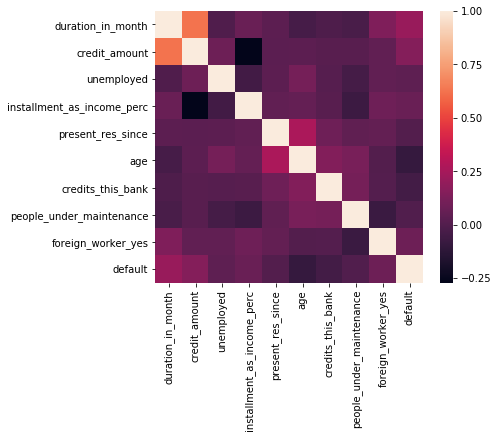

In [12]:
corr = data.corr()

plt.figure(figsize=[6, 5])
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

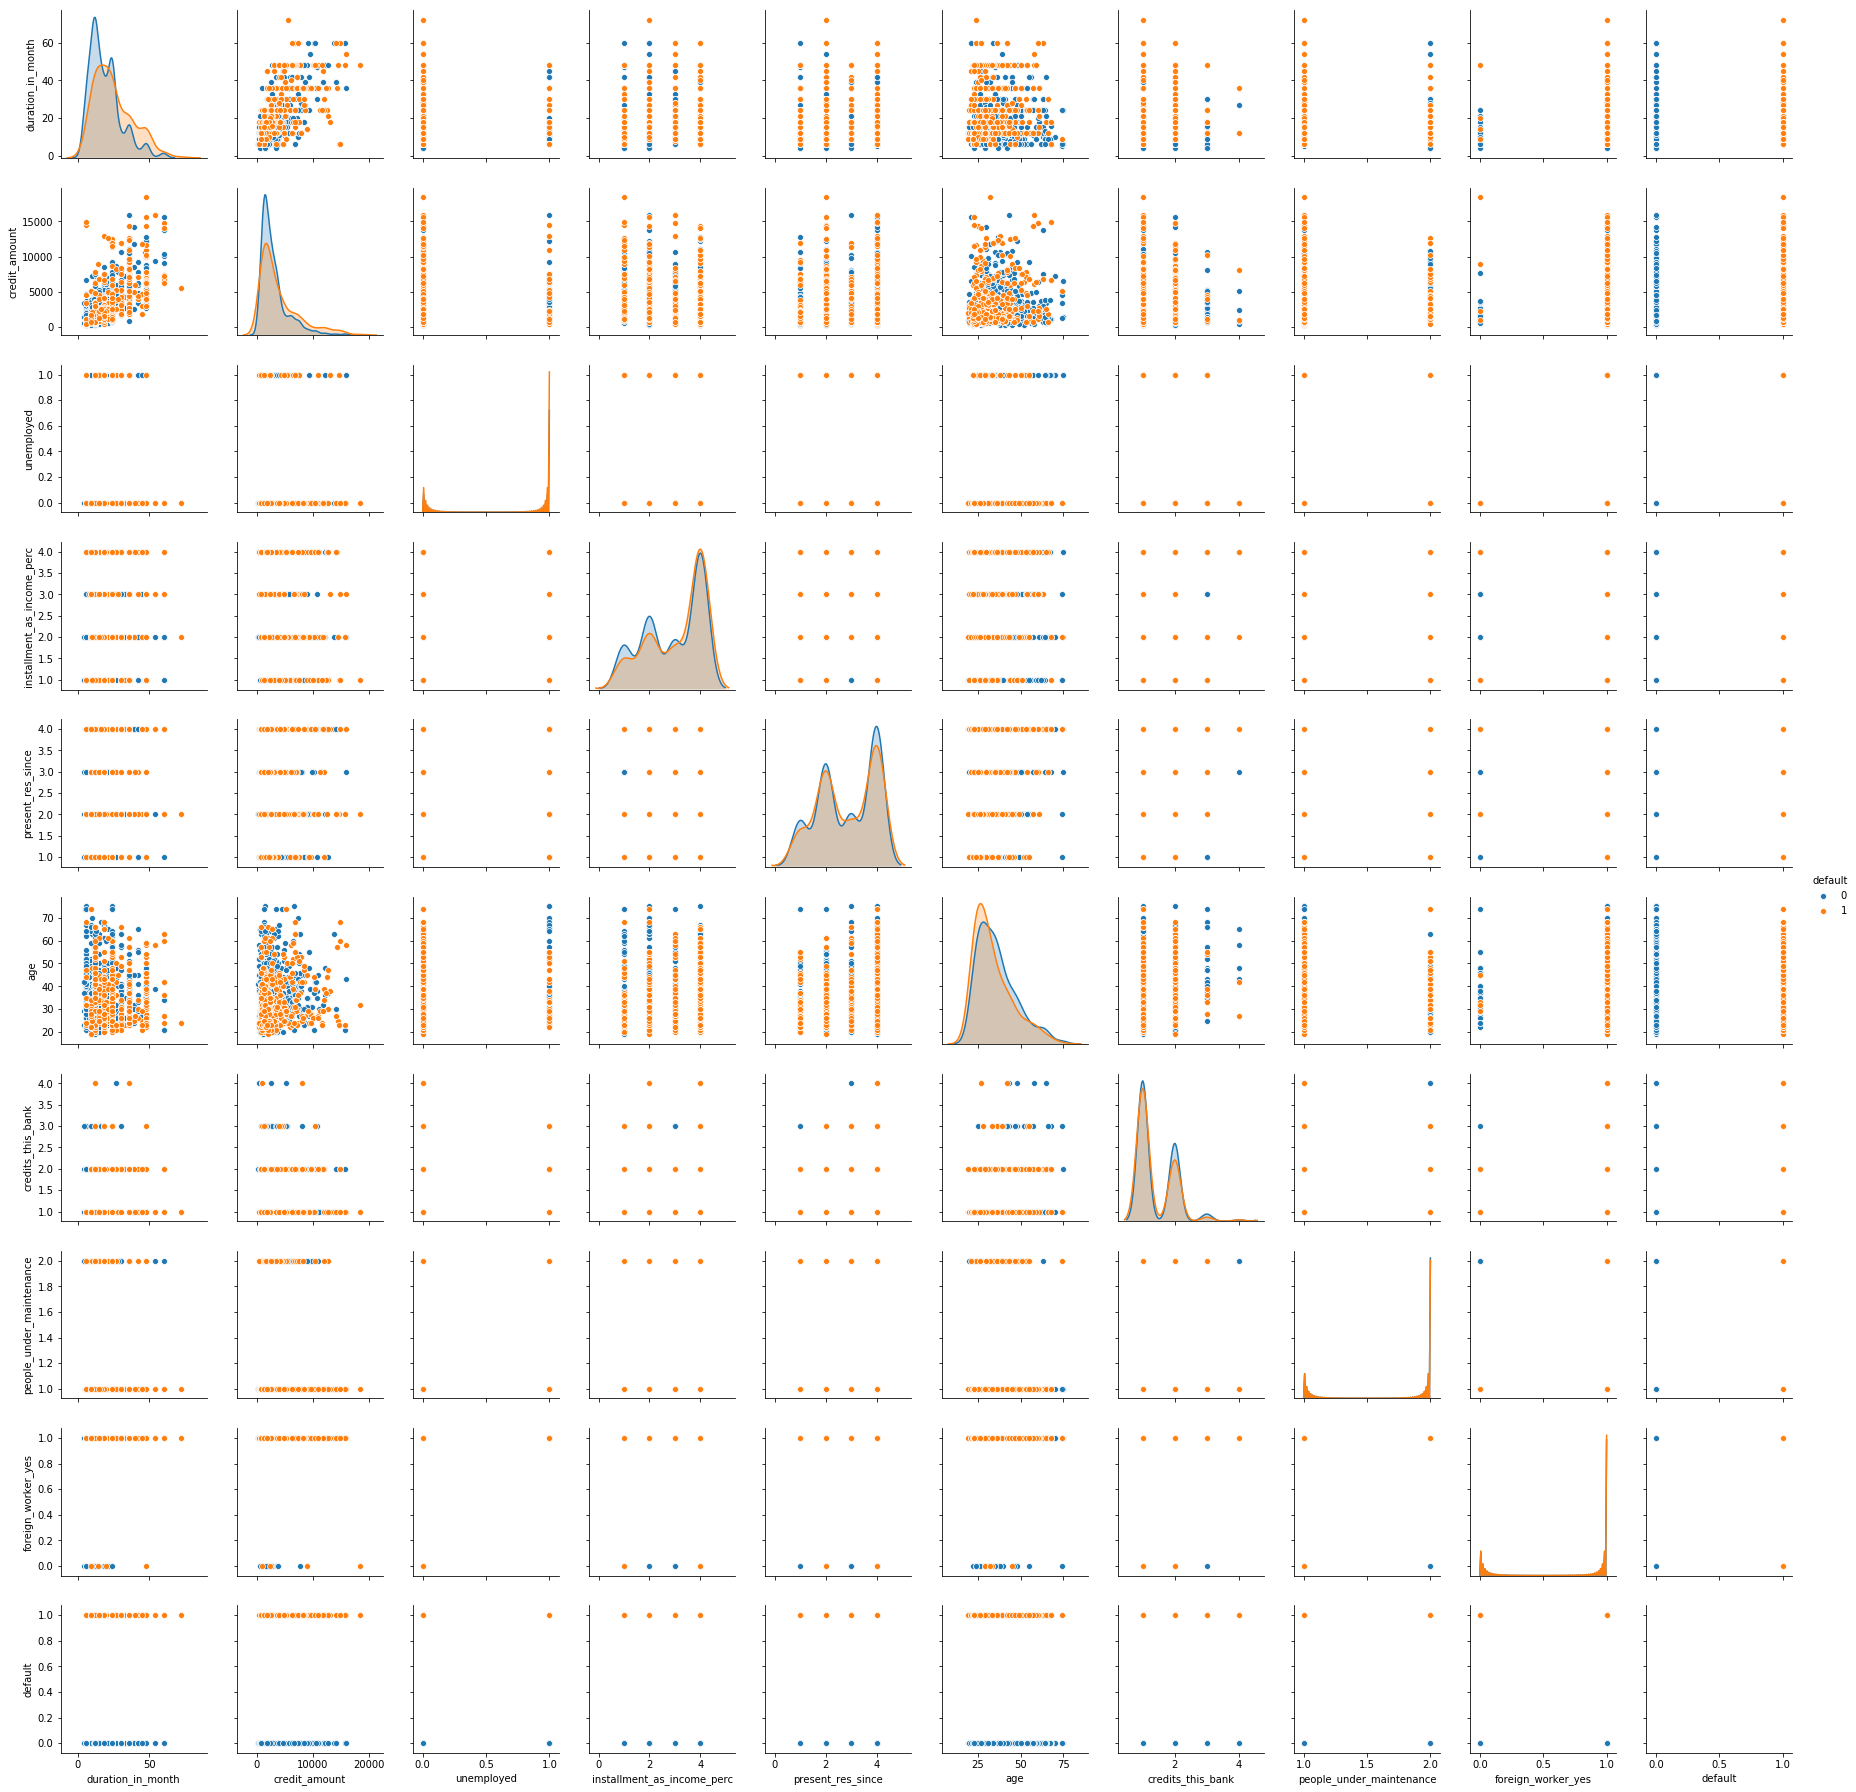

In [13]:
sns.pairplot(data, hue = 'default')

## Logistic Regression (AUC = 0.56)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, classification_report, roc_curve, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [15]:
log_reg = data.copy()

# define X and y
X = log_reg.iloc[:, 0:-1]
y = log_reg.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [18]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[536  23]
 [210  31]]

Confusion matrix for test:
[[140   1]
 [ 51   8]]


In [19]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.5437
Classification report for train:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       559
           1       0.57      0.13      0.21       241

    accuracy                           0.71       800
   macro avg       0.65      0.54      0.52       800
weighted avg       0.67      0.71      0.64       800


AUC test = 0.5643
Classification report for test:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       141
           1       0.89      0.14      0.24        59

    accuracy                           0.74       200
   macro avg       0.81      0.56      0.54       200
weighted avg       0.78      0.74      0.66       200



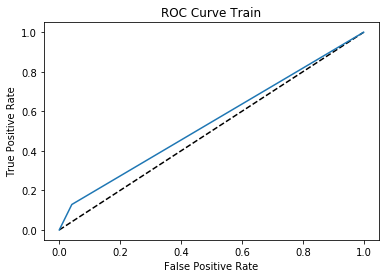

In [20]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

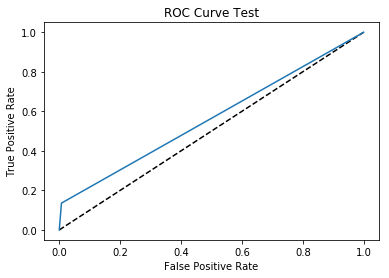

In [21]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

## Random Forest (AUC = 0.56)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
ran_for = data.copy()

# define X and y
X = ran_for.iloc[:, 0:-1]
y = ran_for.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

In [26]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[556   3]
 [ 23 218]]

Confusion matrix for test:
[[127  14]
 [ 51   8]]


In [27]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.9496
Classification report for train:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       559
           1       0.99      0.90      0.94       241

    accuracy                           0.97       800
   macro avg       0.97      0.95      0.96       800
weighted avg       0.97      0.97      0.97       800


AUC test = 0.5182
Classification report for test:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       141
           1       0.36      0.14      0.20        59

    accuracy                           0.68       200
   macro avg       0.54      0.52      0.50       200
weighted avg       0.61      0.68      0.62       200



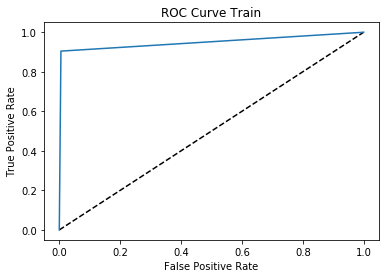

In [28]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

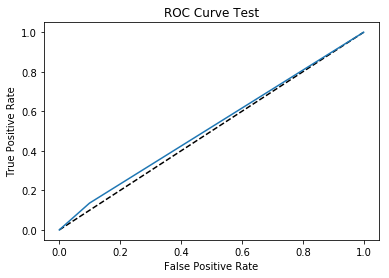

In [29]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

### Oversampling to ADASYN (AUC = 0.63)

In [30]:
from imblearn.over_sampling import ADASYN

X_train, y_train = ADASYN().fit_sample(X_train, y_train)

In [31]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

In [33]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[555   4]
 [  9 567]]

Confusion matrix for test:
[[108  33]
 [ 39  20]]


In [34]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.9886
Classification report for train:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       559
           1       0.99      0.98      0.99       576

    accuracy                           0.99      1135
   macro avg       0.99      0.99      0.99      1135
weighted avg       0.99      0.99      0.99      1135


AUC test = 0.5525
Classification report for test:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.38      0.34      0.36        59

    accuracy                           0.64       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.63      0.64      0.63       200



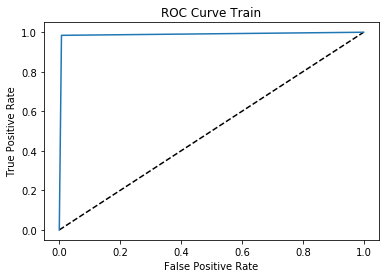

In [35]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

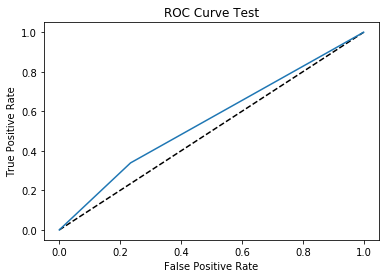

In [36]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

## Gradient Boosting Classifier (AUC = 0.53)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gbclf = data.copy()

# define X and y
X = gbclf.iloc[:, 0:-1]
y = gbclf.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
model_gbclf = GradientBoostingClassifier()
model_gbclf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
y_pred_train = model_gbclf.predict(X_train)
y_pred_test = model_gbclf.predict(X_test)

In [41]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[554   5]
 [118 123]]

Confusion matrix for test:
[[130  11]
 [ 50   9]]


In [42]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.7507
Classification report for train:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       559
           1       0.96      0.51      0.67       241

    accuracy                           0.85       800
   macro avg       0.89      0.75      0.78       800
weighted avg       0.87      0.85      0.83       800


AUC test = 0.5373
Classification report for test:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       141
           1       0.45      0.15      0.23        59

    accuracy                           0.69       200
   macro avg       0.59      0.54      0.52       200
weighted avg       0.64      0.69      0.64       200



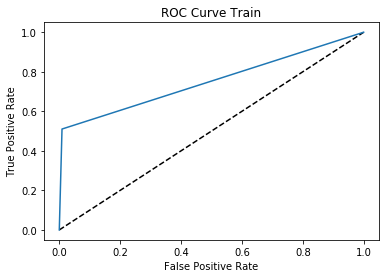

In [43]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

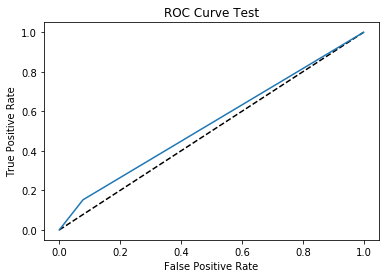

In [44]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

### Oversampling to ADASYN (AUC = 0.57)

In [45]:
X_train, y_train = ADASYN().fit_sample(X_train, y_train)

In [46]:
model_gbclf = GradientBoostingClassifier()
model_gbclf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [47]:
y_pred_train = model_gbclf.predict(X_train)
y_pred_test = model_gbclf.predict(X_test)

In [48]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[453 106]
 [ 77 499]]

Confusion matrix for test:
[[105  36]
 [ 32  27]]


In [49]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.8383
Classification report for train:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       559
           1       0.82      0.87      0.85       576

    accuracy                           0.84      1135
   macro avg       0.84      0.84      0.84      1135
weighted avg       0.84      0.84      0.84      1135


AUC test = 0.6012
Classification report for test:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       141
           1       0.43      0.46      0.44        59

    accuracy                           0.66       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.67      0.66      0.66       200



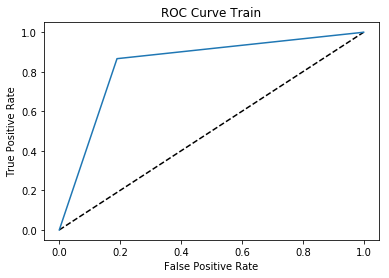

In [50]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

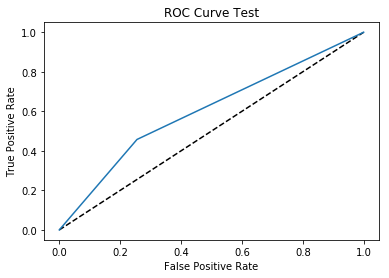

In [51]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

## LightGBM (AUC = 0.57)

In [52]:
import lightgbm as lgb

In [53]:
lgbm = data.copy()

# define X and y
X = lgbm.iloc[:, 0:-1]
y = lgbm.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
y_pred_train = model_lgbm.predict(X_train)
y_pred_test = model_lgbm.predict(X_test)

In [56]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[555   4]
 [ 15 226]]

Confusion matrix for test:
[[116  25]
 [ 40  19]]


In [57]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.9653
Classification report for train:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       559
           1       0.98      0.94      0.96       241

    accuracy                           0.98       800
   macro avg       0.98      0.97      0.97       800
weighted avg       0.98      0.98      0.98       800


AUC test = 0.5724
Classification report for test:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       141
           1       0.43      0.32      0.37        59

    accuracy                           0.68       200
   macro avg       0.59      0.57      0.58       200
weighted avg       0.65      0.68      0.66       200



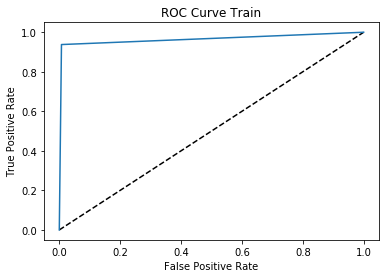

In [58]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

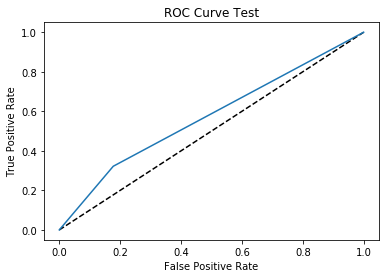

In [59]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

## AdaBoost (AUC = 0.53)

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
ada = data.copy()

# define X and y
X = ada.iloc[:, 0:-1]
y = ada.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [63]:
y_pred_train = model_ada.predict(X_train)
y_pred_test = model_ada.predict(X_test)

In [64]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[524  35]
 [173  68]]

Confusion matrix for test:
[[129  12]
 [ 50   9]]


In [65]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.6098
Classification report for train:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       559
           1       0.66      0.28      0.40       241

    accuracy                           0.74       800
   macro avg       0.71      0.61      0.61       800
weighted avg       0.72      0.74      0.70       800


AUC test = 0.5337
Classification report for test:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       141
           1       0.43      0.15      0.23        59

    accuracy                           0.69       200
   macro avg       0.57      0.53      0.52       200
weighted avg       0.63      0.69      0.63       200



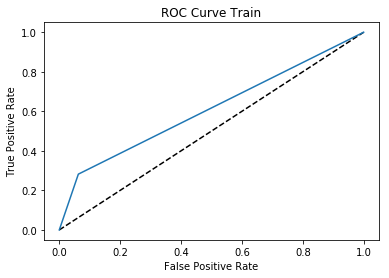

In [66]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

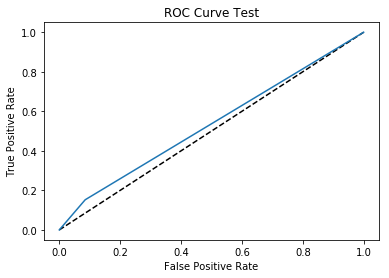

In [67]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

## XGBoost (AUC = 0.54)

In [68]:
import xgboost as xgb
from xgboost import XGBClassifier

In [69]:
xgboost = data.copy()

# define X and y
X = xgboost.iloc[:, 0:-1]
y = xgboost.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

In [72]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[547  12]
 [146  95]]

Confusion matrix for test:
[[131  10]
 [ 50   9]]


In [73]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.6864
Classification report for train:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       559
           1       0.89      0.39      0.55       241

    accuracy                           0.80       800
   macro avg       0.84      0.69      0.71       800
weighted avg       0.82      0.80      0.78       800


AUC test = 0.5408
Classification report for test:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       141
           1       0.47      0.15      0.23        59

    accuracy                           0.70       200
   macro avg       0.60      0.54      0.52       200
weighted avg       0.65      0.70      0.64       200



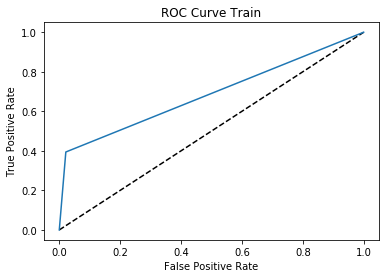

In [74]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

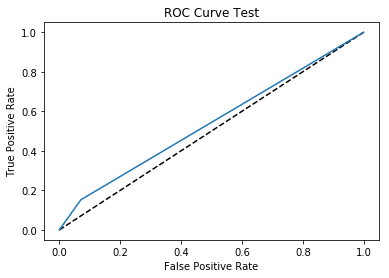

In [75]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

## CatBoost (AUC = 0.58)

In [76]:
import catboost as cb

In [77]:
cat = data.copy()

# define X and y
X = cat.iloc[:, 0:-1]
y = cat.iloc[:, -1]

# split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
model_cb = cb.CatBoostClassifier()
model_cb.fit(X_train, y_train)

Learning rate set to 0.015729
0:	learn: 0.6885417	total: 56.3ms	remaining: 56.2s
1:	learn: 0.6845557	total: 60.8ms	remaining: 30.3s
2:	learn: 0.6805488	total: 65.4ms	remaining: 21.8s
3:	learn: 0.6768289	total: 69.1ms	remaining: 17.2s
4:	learn: 0.6727196	total: 73.7ms	remaining: 14.7s
5:	learn: 0.6691929	total: 78.3ms	remaining: 13s
6:	learn: 0.6658459	total: 82.6ms	remaining: 11.7s
7:	learn: 0.6623313	total: 90ms	remaining: 11.2s
8:	learn: 0.6602455	total: 93.6ms	remaining: 10.3s
9:	learn: 0.6567940	total: 99.1ms	remaining: 9.81s
10:	learn: 0.6533728	total: 104ms	remaining: 9.32s
11:	learn: 0.6502409	total: 108ms	remaining: 8.91s
12:	learn: 0.6468058	total: 112ms	remaining: 8.54s
13:	learn: 0.6441770	total: 118ms	remaining: 8.28s
14:	learn: 0.6415266	total: 122ms	remaining: 8.03s
15:	learn: 0.6386990	total: 126ms	remaining: 7.76s
16:	learn: 0.6360849	total: 131ms	remaining: 7.56s
17:	learn: 0.6331835	total: 135ms	remaining: 7.36s
18:	learn: 0.6306053	total: 139ms	remaining: 7.2s
19:	le

184:	learn: 0.4809849	total: 862ms	remaining: 3.8s
185:	learn: 0.4805264	total: 867ms	remaining: 3.79s
186:	learn: 0.4795081	total: 871ms	remaining: 3.79s
187:	learn: 0.4791905	total: 876ms	remaining: 3.78s
188:	learn: 0.4784457	total: 880ms	remaining: 3.78s
189:	learn: 0.4781606	total: 885ms	remaining: 3.77s
190:	learn: 0.4775291	total: 889ms	remaining: 3.77s
191:	learn: 0.4770923	total: 894ms	remaining: 3.76s
192:	learn: 0.4767735	total: 899ms	remaining: 3.76s
193:	learn: 0.4761391	total: 903ms	remaining: 3.75s
194:	learn: 0.4757521	total: 908ms	remaining: 3.75s
195:	learn: 0.4753930	total: 912ms	remaining: 3.74s
196:	learn: 0.4750526	total: 917ms	remaining: 3.74s
197:	learn: 0.4747166	total: 921ms	remaining: 3.73s
198:	learn: 0.4741399	total: 925ms	remaining: 3.73s
199:	learn: 0.4735865	total: 930ms	remaining: 3.72s
200:	learn: 0.4732265	total: 934ms	remaining: 3.71s
201:	learn: 0.4727622	total: 939ms	remaining: 3.71s
202:	learn: 0.4722535	total: 943ms	remaining: 3.7s
203:	learn: 0.

376:	learn: 0.4118510	total: 1.71s	remaining: 2.82s
377:	learn: 0.4115687	total: 1.71s	remaining: 2.82s
378:	learn: 0.4114142	total: 1.72s	remaining: 2.81s
379:	learn: 0.4111487	total: 1.72s	remaining: 2.81s
380:	learn: 0.4109219	total: 1.73s	remaining: 2.8s
381:	learn: 0.4107382	total: 1.73s	remaining: 2.8s
382:	learn: 0.4103762	total: 1.74s	remaining: 2.79s
383:	learn: 0.4100145	total: 1.74s	remaining: 2.79s
384:	learn: 0.4097117	total: 1.74s	remaining: 2.79s
385:	learn: 0.4093744	total: 1.75s	remaining: 2.78s
386:	learn: 0.4090609	total: 1.75s	remaining: 2.77s
387:	learn: 0.4087233	total: 1.76s	remaining: 2.77s
388:	learn: 0.4084867	total: 1.76s	remaining: 2.77s
389:	learn: 0.4082890	total: 1.76s	remaining: 2.76s
390:	learn: 0.4079448	total: 1.77s	remaining: 2.76s
391:	learn: 0.4076448	total: 1.77s	remaining: 2.75s
392:	learn: 0.4073093	total: 1.78s	remaining: 2.75s
393:	learn: 0.4067620	total: 1.78s	remaining: 2.74s
394:	learn: 0.4065493	total: 1.79s	remaining: 2.74s
395:	learn: 0.

568:	learn: 0.3528906	total: 2.56s	remaining: 1.94s
569:	learn: 0.3526080	total: 2.56s	remaining: 1.93s
570:	learn: 0.3523266	total: 2.57s	remaining: 1.93s
571:	learn: 0.3520659	total: 2.57s	remaining: 1.93s
572:	learn: 0.3517347	total: 2.58s	remaining: 1.92s
573:	learn: 0.3514609	total: 2.58s	remaining: 1.92s
574:	learn: 0.3511584	total: 2.58s	remaining: 1.91s
575:	learn: 0.3508994	total: 2.59s	remaining: 1.91s
576:	learn: 0.3505956	total: 2.59s	remaining: 1.9s
577:	learn: 0.3503956	total: 2.6s	remaining: 1.9s
578:	learn: 0.3500722	total: 2.6s	remaining: 1.89s
579:	learn: 0.3498323	total: 2.61s	remaining: 1.89s
580:	learn: 0.3495185	total: 2.61s	remaining: 1.88s
581:	learn: 0.3492790	total: 2.62s	remaining: 1.88s
582:	learn: 0.3489419	total: 2.62s	remaining: 1.88s
583:	learn: 0.3486896	total: 2.63s	remaining: 1.87s
584:	learn: 0.3485191	total: 2.63s	remaining: 1.86s
585:	learn: 0.3482420	total: 2.63s	remaining: 1.86s
586:	learn: 0.3479319	total: 2.64s	remaining: 1.86s
587:	learn: 0.34

766:	learn: 0.3027854	total: 3.42s	remaining: 1.04s
767:	learn: 0.3025775	total: 3.43s	remaining: 1.03s
768:	learn: 0.3022918	total: 3.43s	remaining: 1.03s
769:	learn: 0.3019754	total: 3.44s	remaining: 1.03s
770:	learn: 0.3017496	total: 3.44s	remaining: 1.02s
771:	learn: 0.3015773	total: 3.44s	remaining: 1.02s
772:	learn: 0.3014502	total: 3.45s	remaining: 1.01s
773:	learn: 0.3013148	total: 3.45s	remaining: 1.01s
774:	learn: 0.3010743	total: 3.46s	remaining: 1s
775:	learn: 0.3008584	total: 3.46s	remaining: 999ms
776:	learn: 0.3006250	total: 3.46s	remaining: 995ms
777:	learn: 0.3004505	total: 3.47s	remaining: 990ms
778:	learn: 0.3000802	total: 3.47s	remaining: 986ms
779:	learn: 0.2999170	total: 3.48s	remaining: 981ms
780:	learn: 0.2995211	total: 3.48s	remaining: 977ms
781:	learn: 0.2992544	total: 3.49s	remaining: 972ms
782:	learn: 0.2990341	total: 3.49s	remaining: 968ms
783:	learn: 0.2989321	total: 3.5s	remaining: 963ms
784:	learn: 0.2988791	total: 3.5s	remaining: 959ms
785:	learn: 0.298

955:	learn: 0.2637602	total: 4.26s	remaining: 196ms
956:	learn: 0.2634590	total: 4.26s	remaining: 192ms
957:	learn: 0.2634271	total: 4.27s	remaining: 187ms
958:	learn: 0.2632770	total: 4.27s	remaining: 183ms
959:	learn: 0.2630544	total: 4.28s	remaining: 178ms
960:	learn: 0.2627948	total: 4.28s	remaining: 174ms
961:	learn: 0.2627179	total: 4.29s	remaining: 169ms
962:	learn: 0.2626128	total: 4.29s	remaining: 165ms
963:	learn: 0.2624149	total: 4.29s	remaining: 160ms
964:	learn: 0.2622075	total: 4.3s	remaining: 156ms
965:	learn: 0.2621356	total: 4.3s	remaining: 152ms
966:	learn: 0.2618838	total: 4.31s	remaining: 147ms
967:	learn: 0.2617155	total: 4.31s	remaining: 143ms
968:	learn: 0.2614261	total: 4.32s	remaining: 138ms
969:	learn: 0.2612788	total: 4.32s	remaining: 134ms
970:	learn: 0.2610758	total: 4.33s	remaining: 129ms
971:	learn: 0.2609516	total: 4.33s	remaining: 125ms
972:	learn: 0.2608091	total: 4.34s	remaining: 120ms
973:	learn: 0.2607786	total: 4.34s	remaining: 116ms
974:	learn: 0.

In [79]:
y_pred_train = model_cb.predict(X_train)
y_pred_test = model_cb.predict(X_test)

In [80]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[559   0]
 [ 57 184]]

Confusion matrix for test:
[[129  12]
 [ 44  15]]


In [81]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.8817
Classification report for train:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       559
           1       1.00      0.76      0.87       241

    accuracy                           0.93       800
   macro avg       0.95      0.88      0.91       800
weighted avg       0.94      0.93      0.93       800


AUC test = 0.5846
Classification report for test:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       141
           1       0.56      0.25      0.35        59

    accuracy                           0.72       200
   macro avg       0.65      0.58      0.59       200
weighted avg       0.69      0.72      0.68       200



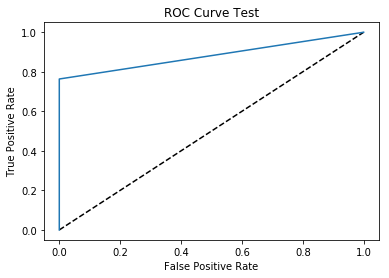

In [82]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

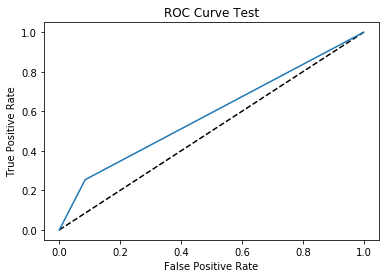

In [83]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()